In [1]:
import pandas as pd
# Load data
file_path = "C:/Users/User/Desktop/assessment/PDA GIP Aptitude Test_Track 1.docx-EmbeddedFile.xlsm"
df = pd.read_excel(file_path)
df.head()

,household_id,num_members,income,education_level,electricity_access,water_access
0,1,4,2500.0,Primary,Yes,No
1,2,5,3000.0,Secondary,Yes,Yes
2,3,3,1800.0,primary,No,No
3,4,6,4200.0,Tertiary,Yes,Yes
4,5,2,1200.0,Secondary,No,No


While exploring the dataset in excel, I noticed there were some integers in the education level, electricity access and water access columns and so I changed them manually before loading the dataset on python. There were also some spelling mistakes which were not many and so could be manually changed.

In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with the mean 
df['income'] = df['income'].fillna(df['income'].mean())


# Verify there are no more missing values
print(df.isnull().sum())


household_id          0
num_members           0
income                6
education_level       1
electricity_access    1
water_access          1
dtype: int64
household_id          0
num_members           0
income                0
education_level       1
electricity_access    1
water_access          1
dtype: int64


In [3]:
# Check for duplicates
print(df.duplicated().sum())

# Find duplicates
duplicates = df[df.duplicated()]

# Print duplicates
print(duplicates)

# Remove duplicates
df = df.drop_duplicates()

# Verify duplicates are removed
print(df.duplicated().sum())


4
    household_id  num_members  income education_level electricity_access  \
29             8            5  3500.0        Tertiary                Yes   
43            42            3  2200.0       Secondary                 No   
69            17            3  1600.0         Primary                 No   
90            17            3  1600.0         Primary                 No   

   water_access  
29          Yes  
43          Yes  
69           No  
90           No  
0


In [14]:
# Convert all string columns to lowercase
df['education_level'] = df['education_level'].str.lower()

# Ensure numerical consistency (e.g., number_of_family_members should be an integer)
df['num_members'] = df['num_members'].astype(int)
df['household_id'] = df['household_id'].astype(int)

# Verify changes
print(df.dtypes)

household_id            int32
num_members             int32
income                float64
education_level        object
electricity_access     object
water_access           object
dtype: object


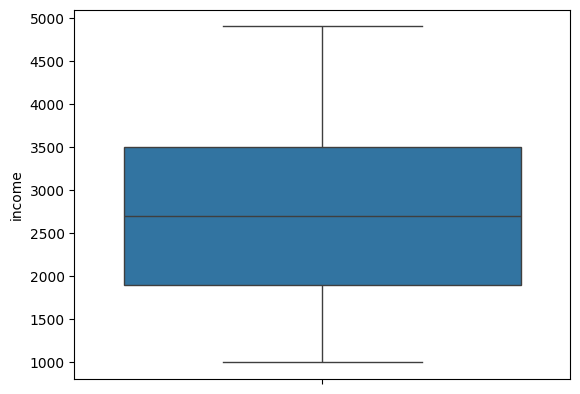

       household_id  num_members       income
count    103.000000   103.000000   103.000000
mean      52.000000     3.932039  2745.188888
std       29.877528     1.366706  1092.504078
min        1.000000     2.000000  1000.000000
25%       26.500000     3.000000  1900.000000
50%       52.000000     4.000000  2700.000000
75%       77.500000     5.000000  3500.000000
max      103.000000     6.000000  4900.000000


In [15]:
# Check for outliers in income
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['income'])
plt.show()

# Verify data consistency
print(df.describe())

       household_id  num_members       income
count    103.000000   103.000000   103.000000
mean      52.000000     3.932039  2745.188888
std       29.877528     1.366706  1092.504078
min        1.000000     2.000000  1000.000000
25%       26.500000     3.000000  1900.000000
50%       52.000000     4.000000  2700.000000
75%       77.500000     5.000000  3500.000000
max      103.000000     6.000000  4900.000000


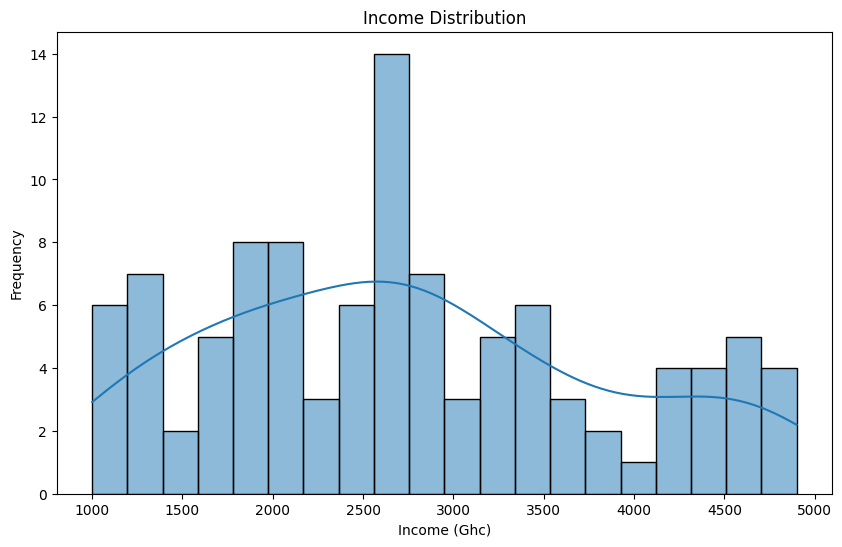

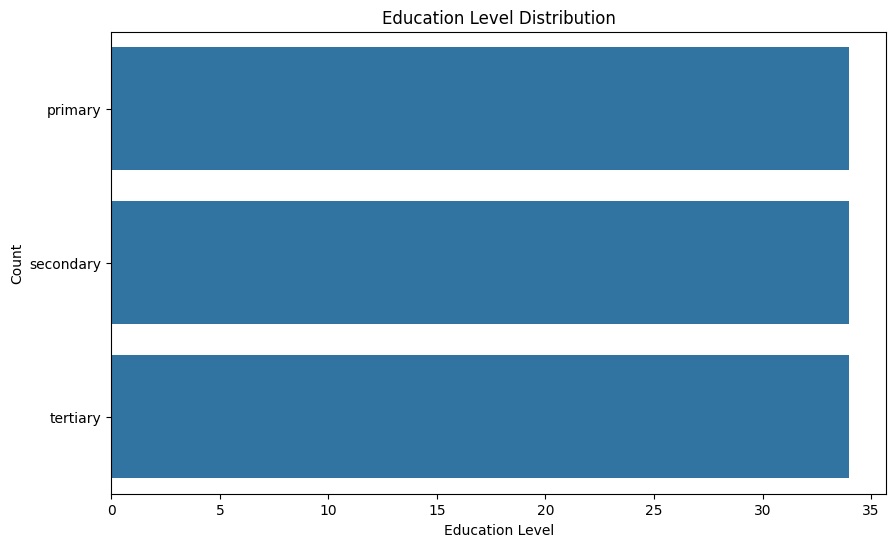

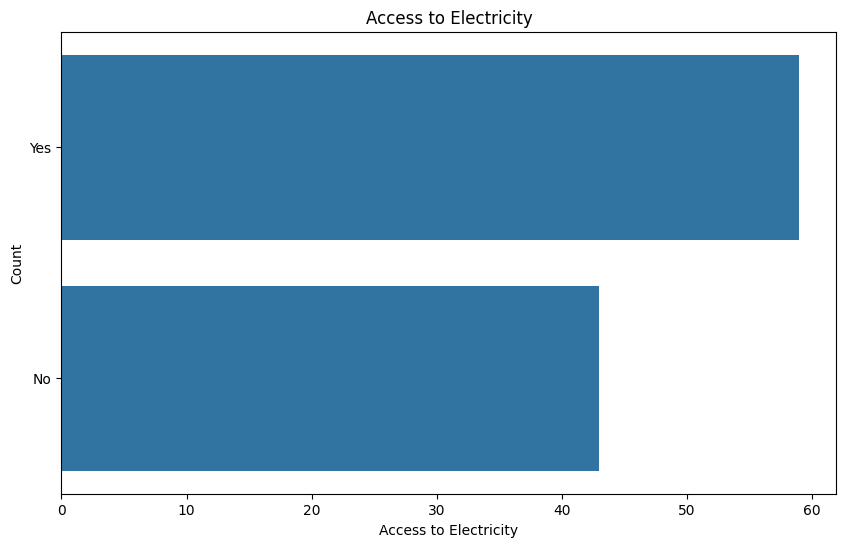

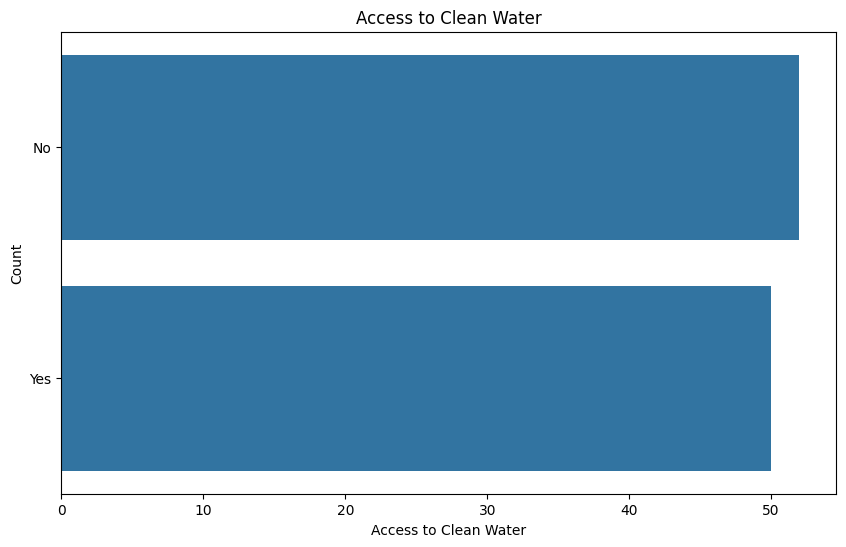

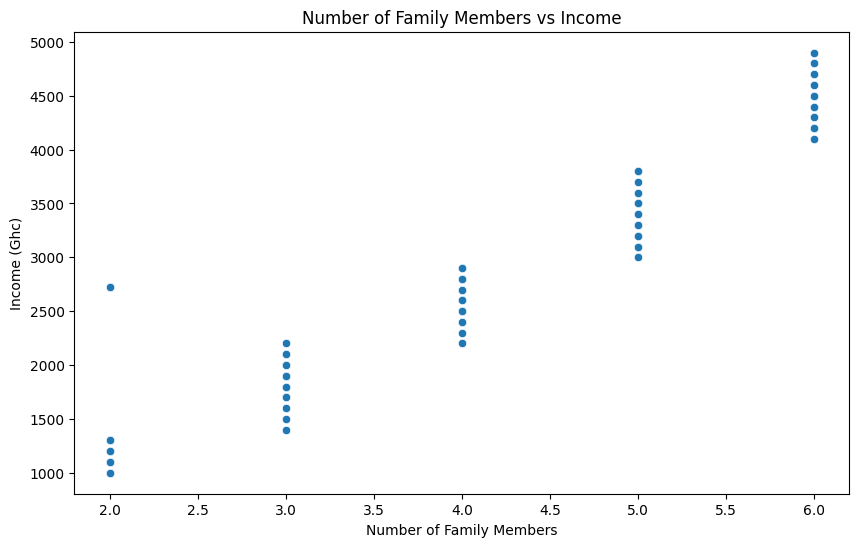

In [21]:
# Summary statistics
print(df.describe())

# Distribution of income
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income (Ghc)')
plt.ylabel('Frequency')
plt.show()

# Education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(df['education_level'])
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Access to basic amenities
plt.figure(figsize=(10, 6))
sns.countplot(df['electricity_access'])
plt.title('Access to Electricity')
plt.xlabel('Access to Electricity')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(df['water_access'])
plt.title('Access to Clean Water')
plt.xlabel('Access to Clean Water')
plt.ylabel('Count')
plt.show()

# Relationship between number of family members and income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_members', y='income', data=df)
plt.title('Number of Family Members vs Income')
plt.xlabel('Number of Family Members')
plt.ylabel('Income (Ghc)')
plt.show()

   household_id  num_members  income  education_level  electricity_access  \
0             1            4  2500.0                0                   1   
1             2            5  3000.0                1                   1   
2             3            3  1800.0                0                   0   
3             4            6  4200.0                2                   1   
4             5            2  1200.0                1                   0   

   water_access  
0             0  
1             1  
2             0  
3             1  
4             0  
household_id            int32
num_members             int32
income                float64
education_level         int32
electricity_access      int32
water_access            int32
dtype: object
   household_id  num_members  income  education_level  electricity_access  \
0             1            4  2500.0                0                   1   
1             2            5  3000.0                1                   1   
2   

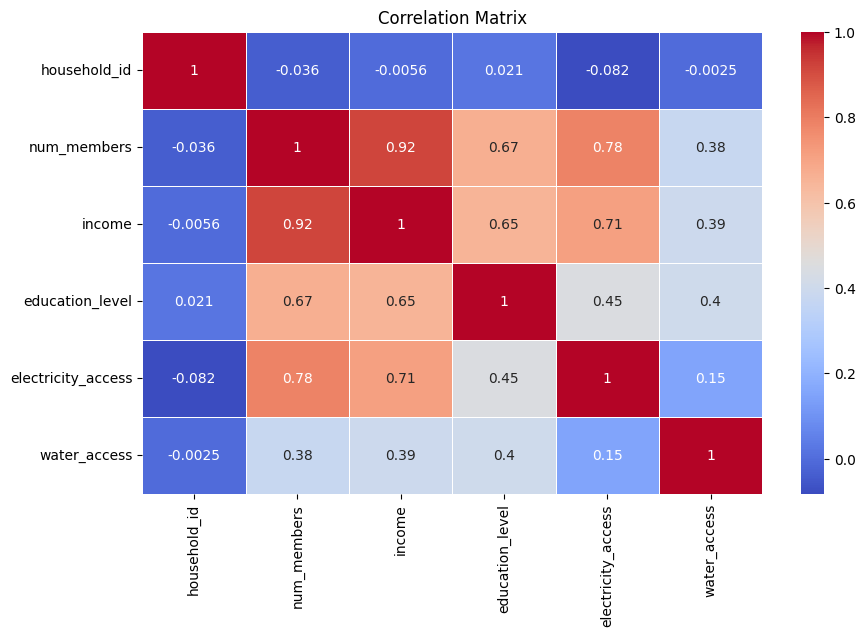

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Identify columns to convert
categorical_columns = ['education_level', 'electricity_access', 'water_access']

# Apply label encoding to the categorical columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Alternatively, apply one-hot encoding to the categorical columns
# df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verify the transformation
print(df.head())

# Verify the conversion
print(df.dtypes)
print(df.head())

# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [34]:
from scipy.stats import ttest_ind

# Identify columns to convert
categorical_columns = ['education_level', 'electricity_access', 'water_access']

# Apply label encoding to the categorical columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Income of households with and without electricity
income_with_electricity = df[df['electricity_access'] == 1]['income']
income_without_electricity = df[df['electricity_access'] == 0]['income']

# Perform T-test
t_stat, p_value = ttest_ind(income_with_electricity, income_without_electricity)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Determine the level of significance
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the income with electricity and income without electricity.")
else:
    print("There is no statistically significant difference between the income with electricity and income without electricity..")

T-statistic: 11.679111718642918, P-value: 2.161106011383086e-20
There is a statistically significant difference between the income with electricity and income without electricity.


In [35]:
# Income of households with and without electricity
income_with_electricity = df[df['water_access'] == 1]['income']
income_without_electricity = df[df['water_access'] == 0]['income']

# Perform T-test
t_stat, p_value = ttest_ind(income_with_electricity, income_without_electricity)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Determine the level of significance
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the income with water and income without water.")
else:
    print("There is no statistically significant difference between the income with water and income without water.")

T-statistic: 4.913290760735727, P-value: 3.5044662639645776e-06
There is a statistically significant difference between the income with water and income without water.


In [37]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['education_level'], df['water_access'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}, P-value: {p}")


Chi-Square statistic: 29.56472850678733, P-value: 4.755048898105855e-05


In [38]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['education_level'], df['electricity_access'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}, P-value: {p}")


Chi-Square statistic: 40.33643256277679, P-value: 3.911664667651233e-07
